In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fraud-email-dataset/fraud_email_.csv


In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Load the Kaggle dataset
data = pd.read_csv('/kaggle/input/fraud-email-dataset/fraud_email_.csv')

# Display column names
print("Columns in the dataset:", data.columns)
data.shape
data.info()
data.isnull().sum()
data = data.dropna()
data.isnull().sum()
data.duplicated().sum()
data = data.drop_duplicates()
data.shape
data.head(n=5)


Columns in the dataset: Index(['Text', 'Class'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11929 entries, 0 to 11928
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    11928 non-null  object
 1   Class   11929 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 186.5+ KB


,Text,Class
0,Supply Quality China's EXCLUSIVE dimensions at...,1
1,over. SidLet me know. Thx.,0
2,"Dear Friend,Greetings to you.I wish to accost ...",1
3,MR. CHEUNG PUIHANG SENG BANK LTD.DES VOEUX RD....,1
4,Not a surprising assessment from Embassy.,0


<Axes: xlabel='Class', ylabel='count'>

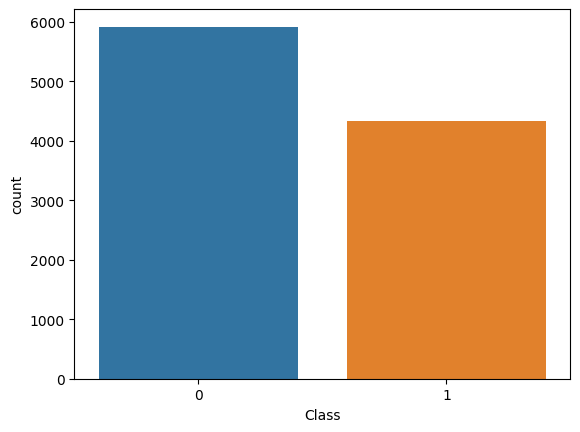

In [3]:
import seaborn as sns
sns.countplot(data=data,x=data['Class'])

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(data.Text,data.Class,test_size=0.25)
clf=Pipeline([
    ('vectorizer',CountVectorizer()),
    ('nb',MultinomialNB())
])
clf.fit(X_train,y_train)
Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])
emails=[
     "I'm copying Rob so a note can be prepared.LB6",
    "Flood Statement Randolph (Arkansas) FLOOD STATEMENT NATIONAL WEATHERSERVICE LITTLE ROCK AR 920 AM CDT SUN MAY 06 2007 . FOR THE FOLLOWINGFORECAST LOCATIONS:. WINDS WILL DIMINISH SOMEWHAT SUNDAY AFTERNOON.NORTHWEST WINDS 5 TO 10 MPH INCREASING TO 10 TO 15 MPH BY LATE MORNING.FIRE WEATHER WATCH NOW IN EFFECT FROM MONDAY AFTERNOON THROUGH MONDAYEVENING.ADDITIONAL ISOLATED TO WIDELY SCATTERED SHOWERS AND THUNDERSTORMS WILLBE POSSIBLE ELSEWHERE ACROSS NORTHEAST AND EAST CENTRAL OKLAHOMA.MOSTLY CLOUDY SKIES ACROSS THE AREA WILL CONTINUE THROUGH THE MORNING.STRONG NORTHERLY WINDS.A WIND ADVISORY REMAINS IN EFFECT UNTIL NOON PDT TODAY. AND LOCALLY THECOASTAL AREAS OF VENTURA AND LOS ANGELES COUNTIES. WIND ADVISORY REMAINSIN EFFECT UNTIL 12 PM ADT TODAY.HIGH WATER LEVELS FOR COPPER RIVER TRIBUTARIES. THEN BEGIN FALLING LATETUESDAY. PORT ALEXANDER 530 AM ADT SUN MAY 6 2007 . WIND ADVISORYREMAINS IN EFFECT UNTIL NOON PDT TODAY. STRONG OFFSHORE WINDS AND VERY"
]
clf.predict(emails)
print("score:", clf.score(X_test,y_test))


0.9683964104564963